### Data Cleaning

##### Importing libraries

In [1]:
#Import basic data science libraries
import pandas as pd
import numpy as np

#Visuals
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
from plotly.subplots import make_subplots
from PIL import Image as im
from IPython.display import Image
from scipy import stats
from os import path
from PIL import Image
from IPython.display import SVG, display

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

##### Read file and overview of data

In [2]:
raw_df = pd.read_excel('airbnb_listings_london.xlsx')

In [3]:
raw_df.shape

(47423, 89)

A total of 89 features.

In [4]:
#Peek into dataset
raw_df.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,3029481,https://www.airbnb.com/rooms/3029481,20170304065726,2017-03-04,Charming Victorian House,Traditional victorian house complemented with ...,NaN,Traditional victorian house complemented with ...,none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,1,NaN,"51.4615190443, -0.0782791254672",Host Has Profile Pic
1,3816230,https://www.airbnb.com/rooms/3816230,20170304065726,2017-03-04,charming georgian 2 bed flat,Charming grade 2 listed georgian 2 bed flat wi...,charming georgian 2 bed.,Charming grade 2 listed georgian 2 bed flat wi...,none,Peckham is becoming increasingly trendy and ha...,...,NaN,NaN,NaN,NaN,NaN,moderate,1,NaN,"51.4751048219, -0.0684518436945",Host Has Profile Pic
2,14993338,https://www.airbnb.com/rooms/14993338,20170304065726,2017-03-04,Quiet Room in Leafy Village near Central London,"My place is good for couples, solo adventurers...",Small but well appointed double bedroom overlo...,"My place is good for couples, solo adventurers...",none,Unique residential area of London with lots of...,...,10.0,10.0,10.0,NaN,NaN,flexible,1,1.90,"51.4386734507, -0.0894556991395","Host Has Profile Pic,Instant Bookable"
3,16422652,https://www.airbnb.com/rooms/16422652,20170304065726,2017-03-04,Modern bright and airy room close to Tower Bridge,Bright and airy double room in lovely modern t...,NaN,Bright and airy double room in lovely modern t...,none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,1,NaN,"51.4918710469, -0.0609266708201","Host Has Profile Pic,Is Location Exact"
4,11316144,https://www.airbnb.com/rooms/11316144,20170304065726,2017-03-04,Spacious room in private house.,Newly-decorated double room in beautiful house...,You will receive a friendly welcome from me an...,Newly-decorated double room in beautiful house...,none,We are in a quiet road in a very friendly area...,...,10.0,10.0,10.0,NaN,NaN,flexible,1,1.34,"51.4506189996, -0.0992317809174","Host Has Profile Pic,Is Location Exact"


In [5]:
#Quick glance at all columns info
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47423 entries, 0 to 47422
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   ID                              47423 non-null  int64         
 1   Listing Url                     47423 non-null  object        
 2   Scrape ID                       47423 non-null  int64         
 3   Last Scraped                    47423 non-null  datetime64[ns]
 4   Name                            47422 non-null  object        
 5   Summary                         46284 non-null  object        
 6   Space                           32074 non-null  object        
 7   Description                     47416 non-null  object        
 8   Experiences Offered             47423 non-null  object        
 9   Neighborhood Overview           27791 non-null  object        
 10  Notes                           18247 non-null  object        
 11  Tr

Looking at columns info we see a a lot of columns have lower count for non-null values than the total records.

In [6]:
# Check for null values
raw_df.isna().sum()

ID                                    0
Listing Url                           0
Scrape ID                             0
Last Scraped                          0
Name                                  1
                                  ...  
Cancellation Policy                   0
Calculated host listings count        0
Reviews per Month                 14384
Geolocation                           0
Features                             33
Length: 89, dtype: int64

In [7]:
#standardize column names for easier usage
raw_df.columns = [i.replace(' ', '_').lower() for i in raw_df.columns]

---
#### Cleaning Step 1: Eliminate excess features to simplify the cleaning

##### Too many columns to work with so first lets review the columns with over 40% of null values

In [8]:
#To inspect name of these introduce an array
null_col_with_count = []
#introducing null_col array to use later to delete the columns with 40%+ null values
null_col = []
col = raw_df.columns
for i in col:
    if raw_df[i].isna().sum() > 0.40*raw_df.shape[0]:
        null_col_with_count.append({i, raw_df[i].isna().sum()})
        null_col.append(i)
        

In [9]:
#Null value counts for these columns
null_col_with_count

[{19632, 'neighborhood_overview'},
 {29176, 'notes'},
 {19835, 'access'},
 {21594, 'interaction'},
 {47423, 'host_acceptance_rate'},
 {47423, 'neighbourhood_group_cleansed'},
 {22426, 'state'},
 {46941, 'square_feet'},
 {38757, 'weekly_price'},
 {40155, 'monthly_price'},
 {26851, 'security_deposit'},
 {47423, 'has_availability'},
 {47423, 'license'},
 {47423, 'jurisdiction_names'}]

In [10]:
#dropping above 40% null values columns
raw_df.drop(null_col, axis = 1, inplace = True)

Lets get rid of the columns that have url links or data that is clearly not useful for data modelling to achieve our project objectives, i.e. deal classifier.

In [11]:
#generate a column list
raw_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'transit', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'street', 'neighbourhood',
       'neighbourhood_cleansed', 'city', 'zipcode', 'market', 'smart_location',
       'country_code', 'country', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'amenities', 'price', 'cleaning_fee', 'guests_included',
       'extra_people', 'minimum_nights', 'maximum_nights', 'calendar_updated',
       'availability_30', 'availability_60', 'availability_90',
    

In [12]:
#quick analysis of data to decide on numeric columns to drop
raw_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,47423.0,1.064957e+07,5.076628e+06,9.554000e+03,6.718552e+06,1.165531e+07,1.518647e+07,1.755034e+07
scrape_id,47423.0,2.017030e+13,2.346900e+01,2.017030e+13,2.017030e+13,2.017030e+13,2.017030e+13,2.017030e+13
host_id,47423.0,3.241099e+07,3.056870e+07,2.010000e+03,7.195398e+06,2.325973e+07,4.809806e+07,1.190148e+08
host_response_rate,35771.0,9.269450e+01,1.878627e+01,0.000000e+00,9.700000e+01,1.000000e+02,1.000000e+02,1.000000e+02
host_listings_count,47415.0,1.734734e+01,8.923452e+01,0.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,7.350000e+02
host_total_listings_count,47415.0,1.734734e+01,8.923452e+01,0.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,7.350000e+02
latitude,47423.0,5.151255e+01,3.961763e-02,5.131654e+01,5.148866e+01,5.151545e+01,5.153784e+01,5.165438e+01
longitude,47423.0,-1.209732e-01,7.339914e-02,-4.792181e-01,-1.808485e-01,-1.194211e-01,-6.899446e-02,2.301637e-01
accommodates,47423.0,3.073466e+00,1.913176e+00,1.000000e+00,2.000000e+00,2.000000e+00,4.000000e+00,1.600000e+01
bathrooms,47236.0,1.266576e+00,5.466929e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.500000e+00,8.000000e+00


In [13]:
#make an array of columns that are excessive mostly url
drop_col = ['listing_url', 'scrape_id', 'last_scraped', 'thumbnail_url', 'picture_url','picture_url', 'medium_url',
            'xl_picture_url', 'host_url', 'host_name', 'host_thumbnail_url', 'host_picture_url', 'geolocation', 'space',
            'calendar_last_scraped', 'first_review', 'last_review', 'street', 'host_since', 'country', 'country_code', 
           'calendar_updated', 'smart_location', 'neighbourhood', 'host_location', 'city', 'market',
            'host_neighbourhood', 'host_total_listings_count','zipcode', 'host_response_rate']

In [14]:
#drop excess columns
raw_df.drop(drop_col, axis=1, inplace = True)

In [15]:
raw_df.shape

(47423, 45)

In [16]:
raw_df.columns

Index(['id', 'name', 'summary', 'description', 'experiences_offered',
       'transit', 'house_rules', 'host_id', 'host_about', 'host_response_time',
       'host_listings_count', 'host_verifications', 'neighbourhood_cleansed',
       'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price',
       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'cancellation_policy',
       'calculated_host_listings_count', 'reviews_per_month', 'features'],
      dtype='object')

---
#### Cleaning Step 2: Eliminate Outliers and  Null Values

In [17]:
raw_df.isna().sum()

id                                    0
name                                  1
summary                            1139
description                           7
experiences_offered                   0
transit                           18419
house_rules                       18126
host_id                               0
host_about                        18499
host_response_time                11652
host_listings_count                   8
host_verifications                   28
neighbourhood_cleansed                0
latitude                              0
longitude                             0
property_type                         0
room_type                             0
accommodates                          0
bathrooms                           187
bedrooms                             86
beds                                132
bed_type                              0
amenities                           538
price                                53
cleaning_fee                      18067


#### Lets start imputing values to remove nulls from rows for most columns

Before I address any null values, we must address availability_365 column and drop all records(rows) that had less than 10 day availability out of last 365 days AND 0 reviews to keep only frequent listings that are rated by guests

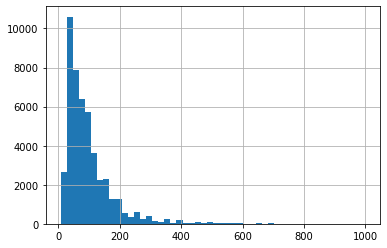

In [18]:
raw_df.price.hist(bins = 50)

The data is skewed with respect to price which is one of the core features for our analysis so we will eliminate all values exceeding $400 of listing price

In [19]:
#dropping rows based on the above mentioned criteria
raw_df.drop(raw_df[raw_df.number_of_reviews < 1].index, inplace=True)
raw_df.drop(raw_df[raw_df.minimum_nights > 30].index, inplace=True)
raw_df.drop(raw_df[raw_df.price > 400].index, inplace=True)

In [20]:
raw_df.shape

(32575, 45)

In [21]:
#Checking for nulls again after trimming the data for outliers
raw_df.isna().sum()

id                                    0
name                                  0
summary                             798
description                           2
experiences_offered                   0
transit                           10288
house_rules                       10358
host_id                               0
host_about                        11017
host_response_time                 5346
host_listings_count                   1
host_verifications                    0
neighbourhood_cleansed                0
latitude                              0
longitude                             0
property_type                         0
room_type                             0
accommodates                          0
bathrooms                            83
bedrooms                             59
beds                                 41
bed_type                              0
amenities                           191
price                                17
cleaning_fee                      10503


In [22]:
#dropping rows with more than 5 missing values
raw_df.dropna(thresh = 40,inplace = True)

In [23]:
raw_df.shape

(31749, 45)

In [24]:
# If Cleaning fees is not available we will assume its 0
raw_df.cleaning_fee.fillna(0, inplace=True)

Seems like they both have similar missing values therefore we will add 'not available' for both and move on as rest of the record looks good.

In [25]:
#Filling all null value in the text columns with not_available for uniformilty.
na_col = ['host_response_time', 'summary', 'transit', 'house_rules', 'host_about', 'amenities', 'features', 'description']

for i in na_col:
    raw_df[i].fillna('not_available', inplace = True)

In [26]:
raw_df.isna().sum()

id                                 0
name                               0
summary                            0
description                        0
experiences_offered                0
transit                            0
house_rules                        0
host_id                            0
host_about                         0
host_response_time                 0
host_listings_count                1
host_verifications                 0
neighbourhood_cleansed             0
latitude                           0
longitude                          0
property_type                      0
room_type                          0
accommodates                       0
bathrooms                         71
bedrooms                          52
beds                              30
bed_type                           0
amenities                          0
price                             16
cleaning_fee                       0
guests_included                    0
extra_people                       0
m

Lets analyse the null values in some of the important features to see if we can impute a reasonable value to it.

In [27]:
#Checking if response time and review scores and response rate have similar null values
def check_null_col(column):
    '''pass column name as a string within '' to get a dataframe of property_type, room_type, accommodates, guests and
    bed_type of all rows that has null value in the given column'''
    x = raw_df.where(raw_df[column].isna())
    x.dropna(axis= 0, how='all', inplace=True)
    return pd.DataFrame(x[['property_type','room_type', 'accommodates', 'guests_included', 'bed_type', 'price']])

In [28]:
check_null_col('bedrooms')

,property_type,room_type,accommodates,guests_included,bed_type,price
892,Apartment,Entire home/apt,2.0,1.0,Real Bed,110.0
1168,Apartment,Entire home/apt,4.0,1.0,Real Bed,130.0
1243,Apartment,Entire home/apt,2.0,2.0,Real Bed,70.0
2134,Apartment,Entire home/apt,4.0,1.0,Real Bed,62.0
3960,Apartment,Entire home/apt,2.0,1.0,Real Bed,100.0
3962,Apartment,Entire home/apt,3.0,1.0,Real Bed,125.0
4908,Apartment,Entire home/apt,2.0,1.0,Real Bed,54.0
5047,House,Entire home/apt,5.0,4.0,Real Bed,190.0
6788,Apartment,Entire home/apt,2.0,1.0,Real Bed,125.0
7217,House,Entire home/apt,4.0,1.0,Real Bed,200.0


For missing `bedrooms` value most listings were apartments and were listed as entire place. Considering prices we can assume that these places had one bed. Though `accommodates` column had some higher values the guests included gives a clear indication of all these lisitngs being one-bedroom places

In [29]:
#filling bedrooms with 1

raw_df.bedrooms.fillna(1, inplace=True)

In [30]:
check_null_col('bathrooms')

,property_type,room_type,accommodates,guests_included,bed_type,price
110,House,Private room,2.0,1.0,Real Bed,25.0
476,House,Private room,2.0,1.0,Real Bed,32.0
1013,House,Private room,1.0,1.0,Real Bed,32.0
1275,Apartment,Entire home/apt,4.0,1.0,Real Bed,115.0
1870,Apartment,Entire home/apt,5.0,2.0,Real Bed,160.0
...,...,...,...,...,...,...
40746,Bed & Breakfast,Private room,2.0,2.0,Real Bed,85.0
41194,Apartment,Private room,2.0,1.0,Real Bed,40.0
46441,House,Private room,2.0,1.0,Real Bed,40.0
46702,Apartment,Entire home/apt,6.0,2.0,Real Bed,110.0


Considering the dataframe above the missing `bathrooms` value listings were mostly private rooms or smaller apartments. These places mostly has a shared bathroom with the host. We will assume that each place had a shared bathroom for the host to use and impute the value of 1 for bathrooms as well.

In [31]:
raw_df.bathrooms.fillna(1, inplace=True)

In [32]:
check_null_col('beds')

,property_type,room_type,accommodates,guests_included,bed_type,price
1823,Apartment,Private room,1.0,1.0,Real Bed,28.0
1951,Apartment,Private room,4.0,1.0,Real Bed,145.0
2134,Apartment,Entire home/apt,4.0,1.0,Real Bed,62.0
2651,Apartment,Private room,2.0,1.0,Real Bed,40.0
3266,House,Private room,1.0,1.0,Real Bed,20.0
4916,Apartment,Private room,2.0,1.0,Real Bed,40.0
7397,House,Private room,3.0,1.0,Real Bed,60.0
7482,Apartment,Entire home/apt,4.0,1.0,Real Bed,61.0
8515,Apartment,Private room,3.0,1.0,Real Bed,172.0
11554,Apartment,Private room,4.0,1.0,Real Bed,30.0


All these places had 1 guest included in the listing and for the bed type had a real bed quoted therefore its safe to impute 1 as the missing value for the `beds` column

In [33]:
raw_df.beds.fillna(1, inplace=True)

Other columns with null values hold crutial information for our analysis. Since they constitue of less than 0.05% of the remaining dataset we will drop these rows completely.

In [34]:
raw_df.isna().sum()

id                                 0
name                               0
summary                            0
description                        0
experiences_offered                0
transit                            0
house_rules                        0
host_id                            0
host_about                         0
host_response_time                 0
host_listings_count                1
host_verifications                 0
neighbourhood_cleansed             0
latitude                           0
longitude                          0
property_type                      0
room_type                          0
accommodates                       0
bathrooms                          0
bedrooms                           0
beds                               0
bed_type                           0
amenities                          0
price                             16
cleaning_fee                       0
guests_included                    0
extra_people                       0
m

In [35]:
#very low percentage of nulls left in the dataset so dropping all rows that have any null values
raw_df.dropna(axis= 0, how='any', inplace=True)

In [36]:
raw_df.shape

(31608, 45)

In [37]:
raw_df.isna().sum().sum()

0

No more null values left in the dataset. 

---

#### Cleaning Step 3: Group low frequency features together for simplicity and efficiency

In [38]:
#Starting it with property type
raw_df.property_type.value_counts()

Apartment             23845
House                  6417
Bed & Breakfast         574
Townhouse               216
Loft                    156
Other                   132
Dorm                     68
Guesthouse               40
Boat                     36
Serviced apartment       29
Condominium              25
Cabin                    22
Boutique hotel           11
Bungalow                  8
Villa                     8
Hostel                    6
Camper/RV                 5
Castle                    2
Yurt                      2
Chalet                    2
Parking Space             1
Hut                       1
Tent                      1
Ryokan (Japan)            1
Name: property_type, dtype: int64

In [39]:
#making sure combining with others would make sense for some of these low freq categories
raw_df.groupby('property_type').median()['price']


property_type
Apartment              80.0
Bed & Breakfast        54.5
Boat                   90.0
Boutique hotel        100.0
Bungalow               52.5
Cabin                  56.0
Camper/RV             149.0
Castle                 82.0
Chalet                112.5
Condominium            50.0
Dorm                   26.0
Guesthouse             55.0
Hostel                 16.5
House                  50.0
Hut                    39.0
Loft                   80.0
Other                  50.5
Parking Space          20.0
Ryokan (Japan)         35.0
Serviced apartment     99.0
Tent                   20.0
Townhouse              60.0
Villa                  27.5
Yurt                  165.0
Name: price, dtype: float64

In [40]:
raw_df.property_type = raw_df.property_type.replace(['Camper/RV', 'Cabin', 'Chalet', 'Dorm', 'Boutique hotel', 'Boat',
                                                       'Guesthouse', 'Yurt', 'Tent', 'Ryokan (Japan)', 'Hut', 'Castle',
                                                    'Parking Space', 'Hostel'], 'Other')
raw_df.property_type = raw_df.property_type.replace(['Serviced apartment', 'Loft', 'Condominium' ], 'Apartment')
raw_df.property_type = raw_df.property_type.replace(['Bungalow', 'Villa', 'Townhouse' ], 'House')



In [41]:
# 2. Neighbourhood
raw_df.neighbourhood_cleansed.value_counts()

Westminster               3653
Tower Hamlets             3574
Hackney                   2961
Camden                    2559
Islington                 2315
Southwark                 2283
Kensington and Chelsea    2249
Lambeth                   2100
Hammersmith and Fulham    1774
Wandsworth                1646
Lewisham                   892
Haringey                   875
Brent                      787
Newham                     677
Ealing                     541
Waltham Forest             526
Greenwich                  526
Barnet                     424
Merton                     345
City of London             202
Hounslow                   183
Enfield                    110
Croydon                    100
Richmond upon Thames        99
Bromley                     92
Redbridge                   73
Bexley                      13
Harrow                       8
Barking and Dagenham         6
Sutton                       4
Kingston upon Thames         4
Hillingdon                   4
Havering

In [42]:
#Checking mean prices in these neighbourhoods for references
round(raw_df.groupby('neighbourhood_cleansed').mean()['price'],1)

neighbourhood_cleansed
Barking and Dagenham       39.7
Barnet                     59.2
Bexley                     49.3
Brent                      74.5
Bromley                    54.2
Camden                    107.6
City of London            142.8
Croydon                    49.9
Ealing                     71.7
Enfield                    53.3
Greenwich                  66.4
Hackney                    79.7
Hammersmith and Fulham     94.0
Haringey                   65.5
Harrow                     55.9
Havering                   53.0
Hillingdon                 44.2
Hounslow                   97.9
Islington                  91.6
Kensington and Chelsea    130.5
Kingston upon Thames       59.8
Lambeth                    79.5
Lewisham                   58.4
Merton                     83.4
Newham                     62.3
Redbridge                  64.6
Richmond upon Thames      101.3
Southwark                  81.8
Sutton                     34.8
Tower Hamlets              74.1
Waltham Forest   

In [43]:
#Grouping low frequency neighbourhoods
raw_df.neighbourhood_cleansed = raw_df.neighbourhood_cleansed.replace(['Hillingdon','Sutton','Havering','Enfield','Harrow',
                                                                      'Bromley','Barking and Dagenham','Bexley', 'Croydon',
                                                                     'Redbridge', 'Kingston upon Thames'], 'Other')

In [44]:
#3. Cancellation Policy
raw_df.cancellation_policy.value_counts()

strict             14719
moderate            8781
flexible            8094
super_strict_30       14
Name: cancellation_policy, dtype: int64

In [45]:
# We will consider strict as strict and eliminate super strict category for extremely low frequency
raw_df.cancellation_policy = raw_df.cancellation_policy.replace('super_strict_30','strict')

In [46]:
#reset_index to ensure index is loopable
raw_df.reset_index(inplace= True, drop = True)

### Renaming columns for better readability

In [47]:
raw_df.rename(columns={"name": "title", "neighbourhood_cleansed": "neighbourhood", "accommodates":"max_guests",
                      "extra_people": "charge_per_extra_guest", "number_of_reviews": "total_reviews",
                      "review_scores_rating": "overall_rating","review_scores_accuracy": "accuracy_rating",
                      "review_scores_cleanliness": "cleanliness_rating", "review_scores_checkin": "check_in_rating",
                      "review_scores_communication": "communication_rating", "review_scores_location": "location_rating",
                      "review_scores_value": "value_rating"}, inplace= True)

---
##### Save a copy of cleaned data for any other sort of analysis before we enter into a more specialized pre-processing phase of our data modelling

In [48]:
#write a copy of cleaned raw_df for a different type of analysis in the future.
raw_df.to_csv('raw_cleaned.csv', index = False)

---
#### Make a copy for our specialized pre-processing to achieve our project objectives 
---


In [49]:
ab_df = raw_df.copy()

In [50]:
ab_df.shape

(31608, 45)

In [51]:
#Checking how similar are these two columns
(ab_df.calculated_host_listings_count == ab_df.host_listings_count).value_counts()

True     26743
False     4865
dtype: int64

In [52]:
#Drop unneccessary columns
col_drop2 = ['host_id', 'host_verifications','availability_30', 'availability_60', 'availability_90',  'maximum_nights',
             'availability_365', 'calculated_host_listings_count', 'minimum_nights', 'host_about']
ab_df.drop(col_drop2, axis =1, inplace=True)

In [53]:
ab_df.shape

(31608, 35)

In [54]:
ab_df.columns

Index(['id', 'title', 'summary', 'description', 'experiences_offered',
       'transit', 'house_rules', 'host_response_time', 'host_listings_count',
       'neighbourhood', 'latitude', 'longitude', 'property_type', 'room_type',
       'max_guests', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities',
       'price', 'cleaning_fee', 'guests_included', 'charge_per_extra_guest',
       'total_reviews', 'overall_rating', 'accuracy_rating',
       'cleanliness_rating', 'check_in_rating', 'communication_rating',
       'location_rating', 'value_rating', 'cancellation_policy',
       'reviews_per_month', 'features'],
      dtype='object')

---

####  Feature extraction and introducing target variable

In [55]:
#check if division by bedrooms will be possible because there can not be zero bedrooms even 
ab_df.bedrooms.value_counts()

1.0     21396
2.0      6259
3.0      1647
0.0      1600
4.0       544
5.0       137
6.0        21
7.0         2
10.0        1
8.0         1
Name: bedrooms, dtype: int64

In [56]:
#checking whattype of room_types were booked under 0 bedrooms
b = ab_df.where(raw_df['bedrooms'] == 0.0)
b.dropna(axis= 0, how='all', inplace=True)
print(b.property_type.value_counts())
print(b.room_type.value_counts())

Apartment          1513
House                53
Other                33
Bed & Breakfast       1
Name: property_type, dtype: int64
Entire home/apt    1484
Private room        116
Name: room_type, dtype: int64


In [57]:
c = ab_df.where(raw_df['beds'] == 0.0)
c.dropna(axis= 0, how='all', inplace=True)
print(c.property_type.value_counts())
print(c.room_type.value_counts())

Apartment    1
Name: property_type, dtype: int64
Private room    1
Name: room_type, dtype: int64


All listings that listed `bedrooms` as 0.0 were either Entire home/apt or Private Room so either way bedrooms can be assumed as 1 since its not shared space.

In [58]:
#Either way bedrooms can not be zero if someone is not living in the living room(shared space), therefore we will replace
#all 0.0 values with 1.0

ab_df.bedrooms.replace(0.0,1.0,inplace = True)
ab_df.beds.replace(0.0,1.0,inplace = True)

In [59]:
#adding Beds per bedroom as a derived feature
ab_df['beds_per_bedroom'] = round(ab_df.beds/ab_df.bedrooms,1)

In [60]:
#adding max_guests per bed feature 
ab_df['max_guests_per_bed'] = round(ab_df.max_guests/ab_df.beds,1)

In [61]:
#Adding normally allowed guests per bed without any extra charge
ab_df['included_guests_per_bed'] = round(ab_df.guests_included/ab_df.beds,1)

In [62]:
# adding a feature that will calculate the maxium host can make from the extra guests
ab_df['add_guests_upsell'] = round((ab_df.max_guests - ab_df.guests_included)* ab_df.charge_per_extra_guest,1)

In [63]:
#for simplicity we will convert host listing counts column into binary values where
#we will categorize any listing with more than 3 listings as 'professionally managed'

ab_df['professionally_managed'] = (ab_df.host_listings_count > 3)

# we will drop the host lisiting count column
ab_df.drop('host_listings_count', axis =1, inplace = True)

In [64]:
#approx 28% of the total listings are professionally managed
ab_df.professionally_managed.value_counts()

False    23976
True      7632
Name: professionally_managed, dtype: int64

In [65]:
ab_df.bed_type.value_counts()

Real Bed         30934
Pull-out Sofa      418
Futon              165
Couch               67
Airbed              24
Name: bed_type, dtype: int64

In [66]:
#for simplicty bed_type will be converted into a binary column if its real_bed or not
ab_df['real_bed'] = (ab_df.bed_type == 'Real Bed')
# we will drop the host lisiting count column
ab_df.drop('bed_type', axis =1, inplace = True)

In [67]:
ab_df.shape

(31608, 39)

In [68]:
round(ab_df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
id,31608.0,9768939.14,5038130.28,9554.00,5666207.75,10250970.50,14262515.00,17459300.00
latitude,31608.0,51.51,0.04,51.32,51.49,51.52,51.54,51.65
longitude,31608.0,-0.12,0.07,-0.48,-0.18,-0.12,-0.07,0.23
max_guests,31608.0,3.09,1.82,1.00,2.00,2.00,4.00,16.00
bathrooms,31608.0,1.24,0.49,0.00,1.00,1.00,1.50,8.00
bedrooms,31608.0,1.38,0.72,1.00,1.00,1.00,2.00,10.00
beds,31608.0,1.70,1.14,1.00,1.00,1.00,2.00,16.00
price,31608.0,90.10,62.69,8.00,45.00,75.00,115.00,400.00
cleaning_fee,31608.0,23.71,27.26,0.00,0.00,20.00,35.00,500.00
guests_included,31608.0,1.49,1.08,1.00,1.00,1.00,2.00,16.00


---

#### Introducing our target variable `deal_type`,  derieved from a range of features

---
Our target variable for classification and NLP analysis will be how the listing is priced. It will tell user if the listing is a Good Deal, Fair Deal or an Expensive deal. For that we will use average price based on a group consistiong of following features:

- Neighbourhood
- Property type
- Room type
- Number of bedrooms

Fair deal would be anything within a half Standard deviation of the average price. Good will be lower than 0.5 standard deviation, and Expensive deal will be priced 0.5 standard deviation above the average group price.

Therefore, we will further eliminate any outliers or extremely low frequency data to ensure better model.

---

Double Check for any low frequency records for the above-mentioned features and treat them accordingly.

In [69]:
ab_df.bedrooms.value_counts()

1.0     22996
2.0      6259
3.0      1647
4.0       544
5.0       137
6.0        21
7.0         2
10.0        1
8.0         1
Name: bedrooms, dtype: int64

In [70]:
#dropping low frequency bedrooms count listings i.e. 4 listings with 7,8 and 10 bedrooms. Large places indeed.
ab_df.drop(ab_df[ab_df.bedrooms > 6].index, inplace=True)
ab_df.reset_index(inplace = True, drop = True)

In [71]:
ab_df.property_type.value_counts()

Apartment          24055
House               6646
Bed & Breakfast      574
Other                329
Name: property_type, dtype: int64

In [72]:
ab_df.room_type.value_counts()

Entire home/apt    17063
Private room       14197
Shared room          344
Name: room_type, dtype: int64

In [73]:
ab_df.neighbourhood.value_counts()

Westminster               3653
Tower Hamlets             3574
Hackney                   2961
Camden                    2559
Islington                 2315
Southwark                 2282
Kensington and Chelsea    2249
Lambeth                   2100
Hammersmith and Fulham    1773
Wandsworth                1645
Lewisham                   891
Haringey                   875
Brent                      787
Newham                     677
Ealing                     541
Waltham Forest             526
Greenwich                  526
Barnet                     424
Other                      417
Merton                     345
City of London             202
Hounslow                   183
Richmond upon Thames        99
Name: neighbourhood, dtype: int64

Looks good, now we will go ahead and create that additional column.

In [74]:
#Introducing our target variable for our classification and nlp analysis. we will make some temporary columns
#and will drop these columns after deal type column is generated.
# there is a data leakage because we are not splitting our dataset beforehand

ab_df['relative_avg_price'] = round(ab_df.groupby(['bedrooms', 'property_type', 'room_type',
                                                   'neighbourhood'])['price'].transform('mean'),1)

#another column for standard deviation to use when creating deal type 
ab_df['relative_avg_price_std'] = round(ab_df.groupby(['bedrooms', 'property_type', 'room_type',
                                                   'neighbourhood'])['price'].transform('std'),1)

In [75]:
ab_df['upper_bound'] = (ab_df['relative_avg_price'] + (0.5*ab_df['relative_avg_price_std']))
ab_df['lower_bound'] = (ab_df['relative_avg_price'] - (0.5*ab_df['relative_avg_price_std']))

In [76]:
#checking if dataset looks good
ab_df.head()

,id,title,summary,description,experiences_offered,transit,house_rules,host_response_time,neighbourhood,latitude,...,beds_per_bedroom,max_guests_per_bed,included_guests_per_bed,add_guests_upsell,professionally_managed,real_bed,relative_avg_price,relative_avg_price_std,upper_bound,lower_bound
0,14993338,Quiet Room in Leafy Village near Central London,"My place is good for couples, solo adventurers...","My place is good for couples, solo adventurers...",none,"Free parking on street, on bus route to centra...",not_available,within an hour,Southwark,51.438673,...,1.0,2.0,1.0,10,False,True,43.9,20.0,53.90,33.90
1,11316144,Spacious room in private house.,Newly-decorated double room in beautiful house...,Newly-decorated double room in beautiful house...,none,Excellent transport links. Five minutes easy w...,"Sorry, but no smokers please.",not_available,Southwark,51.450619,...,1.0,2.0,1.0,10,False,True,47.5,14.7,54.85,40.15
2,15780025,Bright room in lovely area plus C/Breakfast,Quiet location in smart area with good restaur...,Quiet location in smart area with good restaur...,none,not_available,Early Check In Weekends only from 1 o Clock on...,within a few hours,Southwark,51.454093,...,2.0,1.5,1.0,10,False,True,43.9,20.0,53.90,33.90
3,10244083,"Bright, airy room by Tower Bridge and river","For solo travellers: Bright, airy room in ver...","For solo travellers: Bright, airy room in ver...",none,Walking In under 5 minutes you can be at Tower...,We are looking for respectful guests to share ...,within a few hours,Southwark,51.503404,...,1.0,1.0,1.0,0,False,True,49.9,21.3,60.55,39.25
4,8129581,Bright apartment at London Bridge,A bright and quiet apartment in Central London...,A bright and quiet apartment in Central London...,none,not_available,I would like that my guests feel like at their...,within a day,Southwark,51.501389,...,1.0,2.0,3.0,0,False,True,92.8,32.3,108.95,76.65


In [77]:
#intiate our target variable with dummy value ' deal'
ab_df['deal_type'] = 'deal'

#create a loop to compare the prices.

for i in range(0,ab_df.shape[0]):
    price = ab_df.price[i]
    upper_bound = ab_df.upper_bound[i]
    lower_bound = ab_df.lower_bound[i]
    if price > upper_bound:
        ab_df.deal_type[i] = 'Expensive'
    elif price < lower_bound:
        ab_df.deal_type[i] = 'Good'
    else:
        ab_df.deal_type[i] = 'Fair'

In [78]:
#Checking how our target variable will be distributed
ab_df.deal_type.value_counts()

Fair         13547
Good         10624
Expensive     7433
Name: deal_type, dtype: int64

---
We will drop the `relative_avg_price_std`, `upper bound` and `lower bound` columns now as having all these columns in the dataset will lead to overfitting and will overshadow other features. We will keep the `relative average price` based on the feature that is an easy calculation as Airbnb already provides that in their app based on the live available listings. 

In [79]:
#dropping columns
temp_col = ['relative_avg_price_std', 'upper_bound', 'lower_bound']
ab_df.drop(temp_col, inplace = True, axis = 1)

In [80]:
ab_df.shape

(31604, 41)

In [81]:
ab_df.columns

Index(['id', 'title', 'summary', 'description', 'experiences_offered',
       'transit', 'house_rules', 'host_response_time', 'neighbourhood',
       'latitude', 'longitude', 'property_type', 'room_type', 'max_guests',
       'bathrooms', 'bedrooms', 'beds', 'amenities', 'price', 'cleaning_fee',
       'guests_included', 'charge_per_extra_guest', 'total_reviews',
       'overall_rating', 'accuracy_rating', 'cleanliness_rating',
       'check_in_rating', 'communication_rating', 'location_rating',
       'value_rating', 'cancellation_policy', 'reviews_per_month', 'features',
       'beds_per_bedroom', 'max_guests_per_bed', 'included_guests_per_bed',
       'add_guests_upsell', 'professionally_managed', 'real_bed',
       'relative_avg_price', 'deal_type'],
      dtype='object')

In [82]:
ab_df.isna().sum()

id                         0
title                      0
summary                    0
description                0
experiences_offered        0
transit                    0
house_rules                0
host_response_time         0
neighbourhood              0
latitude                   0
longitude                  0
property_type              0
room_type                  0
max_guests                 0
bathrooms                  0
bedrooms                   0
beds                       0
amenities                  0
price                      0
cleaning_fee               0
guests_included            0
charge_per_extra_guest     0
total_reviews              0
overall_rating             0
accuracy_rating            0
cleanliness_rating         0
check_in_rating            0
communication_rating       0
location_rating            0
value_rating               0
cancellation_policy        0
reviews_per_month          0
features                   0
beds_per_bedroom           0
max_guests_per

-----

### One hot encode all categorical features with `pd.get_dummies`

#### Amenities

In [83]:
#splitting all amenities with `,` and storing in amenities for easy handling
amenities = ab_df.amenities.str.get_dummies(sep = ',')

In [84]:
amenities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31604 entries, 0 to 31603
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   24-hour check-in                            31604 non-null  int64
 1   Air conditioning                            31604 non-null  int64
 2   Breakfast                                   31604 non-null  int64
 3   Buzzer/wireless intercom                    31604 non-null  int64
 4   Cable TV                                    31604 non-null  int64
 5   Carbon monoxide detector                    31604 non-null  int64
 6   Cat(s)                                      31604 non-null  int64
 7   Dog(s)                                      31604 non-null  int64
 8   Doorman                                     31604 non-null  int64
 9   Doorman Entry                               31604 non-null  int64
 10  Dryer                             

In [85]:
#Removing unnecessary/unexplained/repetitive columns
amenities.drop(['not_available', 'translation missing: en.hosting_amenity_49','translation missing: en.hosting_amenity_50',
                'Doorman Entry'], axis = 1, inplace= True)

In [86]:
corr_df = amenities.corr()

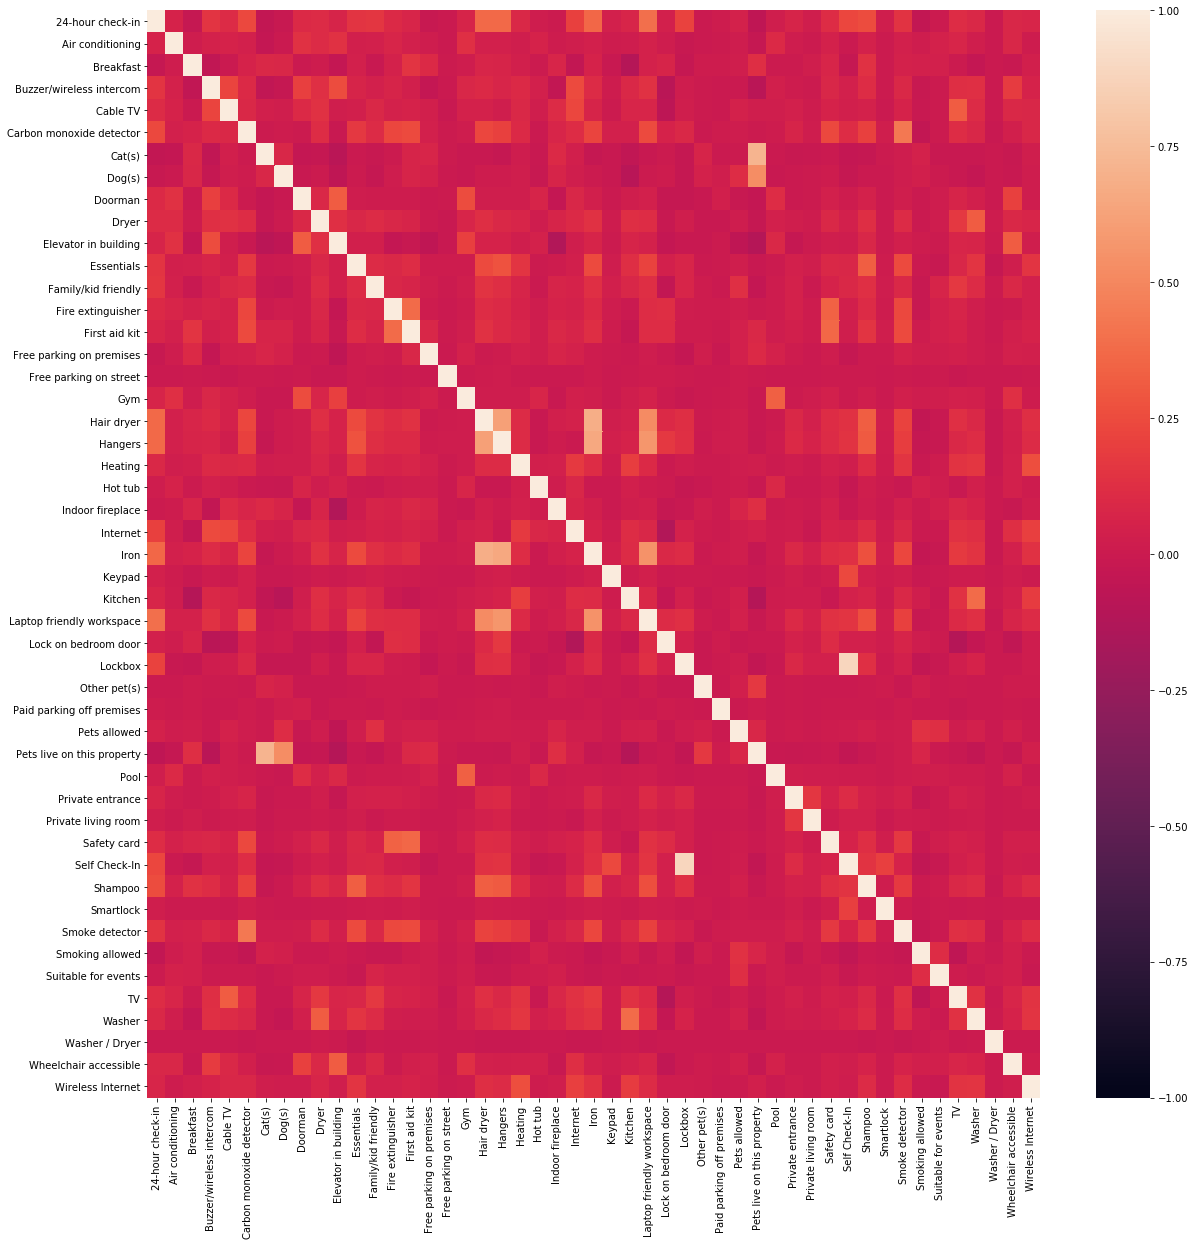

In [87]:
#display heat map to show colinearity again
plt.figure(figsize = (20,20))
sns.heatmap(corr_df,vmin=-1, vmax=1)
sns.heatmap;

In [88]:
#drop any column with less than 80 true values for simplicity i.e. about than 0.5%
drop_col3 = []
for i in range(0,amenities.shape[1]):
    if (amenities[amenities.columns[i]].sum() < 80):
        drop_col3.append(amenities.columns[i])

In [89]:
drop_col3

['Free parking on street',
 'Paid parking off premises',
 'Smartlock',
 'Washer / Dryer']

In [90]:
amenities.columns

Index(['24-hour check-in', 'Air conditioning', 'Breakfast',
       'Buzzer/wireless intercom', 'Cable TV', 'Carbon monoxide detector',
       'Cat(s)', 'Dog(s)', 'Doorman', 'Dryer', 'Elevator in building',
       'Essentials', 'Family/kid friendly', 'Fire extinguisher',
       'First aid kit', 'Free parking on premises', 'Free parking on street',
       'Gym', 'Hair dryer', 'Hangers', 'Heating', 'Hot tub',
       'Indoor fireplace', 'Internet', 'Iron', 'Keypad', 'Kitchen',
       'Laptop friendly workspace', 'Lock on bedroom door', 'Lockbox',
       'Other pet(s)', 'Paid parking off premises', 'Pets allowed',
       'Pets live on this property', 'Pool', 'Private entrance',
       'Private living room', 'Safety card', 'Self Check-In', 'Shampoo',
       'Smartlock', 'Smoke detector', 'Smoking allowed', 'Suitable for events',
       'TV', 'Washer', 'Washer / Dryer', 'Wheelchair accessible',
       'Wireless Internet'],
      dtype='object')

In [91]:
amenities.sum()

24-hour check-in               8973
Air conditioning               1538
Breakfast                      4645
Buzzer/wireless intercom      10541
Cable TV                       6824
Carbon monoxide detector      15730
Cat(s)                         1393
Dog(s)                          775
Doorman                        1384
Dryer                         14017
Elevator in building           7787
Essentials                    27618
Family/kid friendly           18089
Fire extinguisher              8909
First aid kit                  9496
Free parking on premises       6271
Free parking on street           22
Gym                             949
Hair dryer                    18471
Hangers                       20237
Heating                       30437
Hot tub                        2334
Indoor fireplace               2905
Internet                      21327
Iron                          19839
Keypad                           99
Kitchen                       29575
Laptop friendly workspace   

In [92]:
#After checking for correlation dropping highly correlated columns
add_drop_col3 = ['Hair dryer', 'Hangers', 'Dog(s)', 'Cat(s)', 'Lockbox', 'Cable TV']
for i in range(0,len(add_drop_col3)):
    drop_col3.append(add_drop_col3[i])

In [93]:
drop_col3

['Free parking on street',
 'Paid parking off premises',
 'Smartlock',
 'Washer / Dryer',
 'Hair dryer',
 'Hangers',
 'Dog(s)',
 'Cat(s)',
 'Lockbox',
 'Cable TV']

In [94]:
amenities.drop(drop_col3, axis =1, inplace = True)

---

#### Features

In [95]:
#checking features
ab_df.features

0                    Host Has Profile Pic,Instant Bookable
1                   Host Has Profile Pic,Is Location Exact
2                   Host Has Profile Pic,Is Location Exact
3        Host Is Superhost,Host Has Profile Pic,Host Id...
4        Host Has Profile Pic,Host Identity Verified,Is...
                               ...                        
31599    Host Has Profile Pic,Host Identity Verified,Is...
31600    Host Has Profile Pic,Is Location Exact,Instant...
31601    Host Has Profile Pic,Host Identity Verified,Is...
31602    Host Has Profile Pic,Is Location Exact,Instant...
31603    Host Has Profile Pic,Is Location Exact,Instant...
Name: features, Length: 31604, dtype: object

In [96]:
#separating by `,`
features = ab_df.features.str.get_dummies(sep = ',')

In [97]:
features.head()

,Host Has Profile Pic,Host Identity Verified,Host Is Superhost,Instant Bookable,Is Location Exact,Require Guest Phone Verification,Require Guest Profile Picture,not_available
0,1,0,0,1,0,0,0,0
1,1,0,0,0,1,0,0,0
2,1,0,0,0,1,0,0,0
3,1,1,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0


In [98]:
features.isna().sum()

Host Has Profile Pic                0
Host Identity Verified              0
Host Is Superhost                   0
Instant Bookable                    0
Is Location Exact                   0
Require Guest Phone Verification    0
Require Guest Profile Picture       0
not_available                       0
dtype: int64

In [99]:
features.sum()

Host Has Profile Pic                31544
Host Identity Verified              21331
Host Is Superhost                    3488
Instant Bookable                     7101
Is Location Exact                   21008
Require Guest Phone Verification     1173
Require Guest Profile Picture         760
not_available                           9
dtype: int64

In [100]:
#host has profile pic is above 99.9% true so doesnt make any sense to add it to our analysis
features['Host Has Profile Pic'].value_counts()

1    31544
0       60
Name: Host Has Profile Pic, dtype: int64

In [101]:
#Removing repeated or unnecessary columns
features.drop(['not_available', 'Host Has Profile Pic'], axis = 1, inplace= True)

---
#### Other Categorical columns

In [102]:
#array of other categorical columns
cat_col = ['host_response_time','neighbourhood','property_type','cancellation_policy','room_type','experiences_offered']

In [103]:
ab_df.columns

Index(['id', 'title', 'summary', 'description', 'experiences_offered',
       'transit', 'house_rules', 'host_response_time', 'neighbourhood',
       'latitude', 'longitude', 'property_type', 'room_type', 'max_guests',
       'bathrooms', 'bedrooms', 'beds', 'amenities', 'price', 'cleaning_fee',
       'guests_included', 'charge_per_extra_guest', 'total_reviews',
       'overall_rating', 'accuracy_rating', 'cleanliness_rating',
       'check_in_rating', 'communication_rating', 'location_rating',
       'value_rating', 'cancellation_policy', 'reviews_per_month', 'features',
       'beds_per_bedroom', 'max_guests_per_bed', 'included_guests_per_bed',
       'add_guests_upsell', 'professionally_managed', 'real_bed',
       'relative_avg_price', 'deal_type'],
      dtype='object')

In [104]:
#creating a new df with cat_dummies to easily manage it
cat_dummies = pd.get_dummies(ab_df[cat_col])
cat_dummies.shape

(31604, 43)

In [105]:
#We can run this to see how many True values each new column will have
cat_dummies.sum()

host_response_time_a few days or more      649
host_response_time_not_available          4904
host_response_time_within a day           5109
host_response_time_within a few hours     7389
host_response_time_within an hour        13553
neighbourhood_Barnet                       424
neighbourhood_Brent                        787
neighbourhood_Camden                      2559
neighbourhood_City of London               202
neighbourhood_Ealing                       541
neighbourhood_Greenwich                    526
neighbourhood_Hackney                     2961
neighbourhood_Hammersmith and Fulham      1773
neighbourhood_Haringey                     875
neighbourhood_Hounslow                     183
neighbourhood_Islington                   2315
neighbourhood_Kensington and Chelsea      2249
neighbourhood_Lambeth                     2100
neighbourhood_Lewisham                     891
neighbourhood_Merton                       345
neighbourhood_Newham                       677
neighbourhood

In [106]:
cat_dummies.shape

(31604, 43)

--- 
#### Combining them all dataframes

In [107]:
cat_dummies.shape

(31604, 43)

In [108]:
amenities.shape

(31604, 39)

In [109]:
#combine all the one hot encoded data and original data with pd.concat
ab_df = pd.concat([ab_df, amenities, features, cat_dummies], axis=1)

In [110]:
#standardize column names
ab_df.columns = [i.replace(' ', '_').lower() for i in ab_df.columns]

In [111]:
ab_df.shape

(31604, 129)

----
### Exploratory Data Analysis

---

##### Room Types vs Price

---

Lets start with looking at the price comparison between various Room Types and then further look at their distribution.

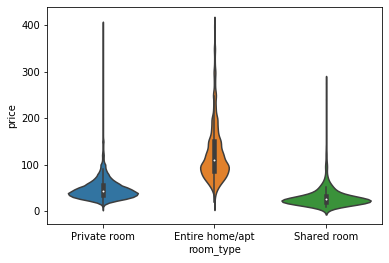

In [112]:
#Room type price spread

ax = sns.violinplot(x="room_type",  y="price", data = ab_df)

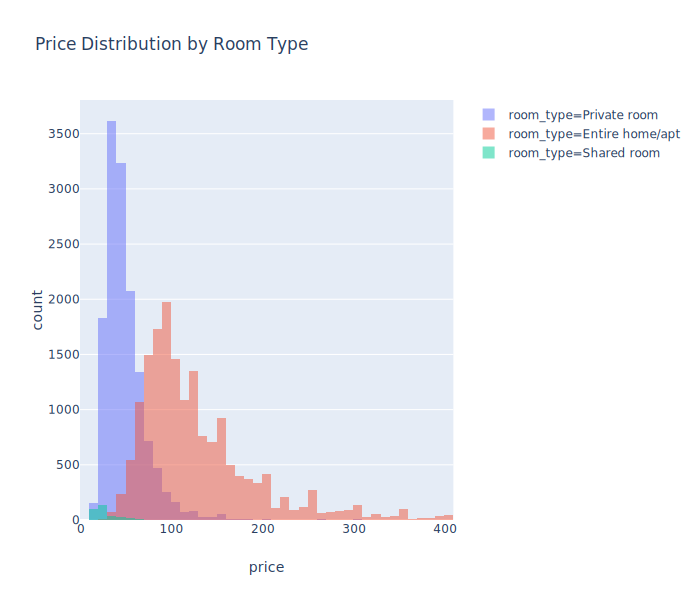

In [113]:
# Sketching price histogram by room type and price

fig = px.histogram(ab_df, x="price", color="room_type", nbins=50, title='Price Distribution by Room Type')
fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.5)
img_bytes = pio.to_image(fig, format="svg")
display(SVG(img_bytes))

Looks like most of the room types were private rooms and had an average of approximately 50 dollars per night pricing. Whereas Entire home/apt averaged about 100 dollars . From the Violin Plot we can see that the max and min price range was approx same for both categories. Shared spaces seem to be less popular with extremely low price point as well.

---
##### Neighbourhood vs Price
---

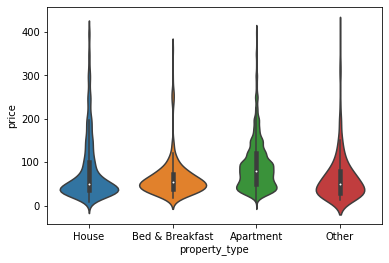

In [114]:
#property type price spread

ax = sns.violinplot(x="property_type",  y="price", data = ab_df)

Apartment listings has a realtively higher price variance, followed by House listings. 

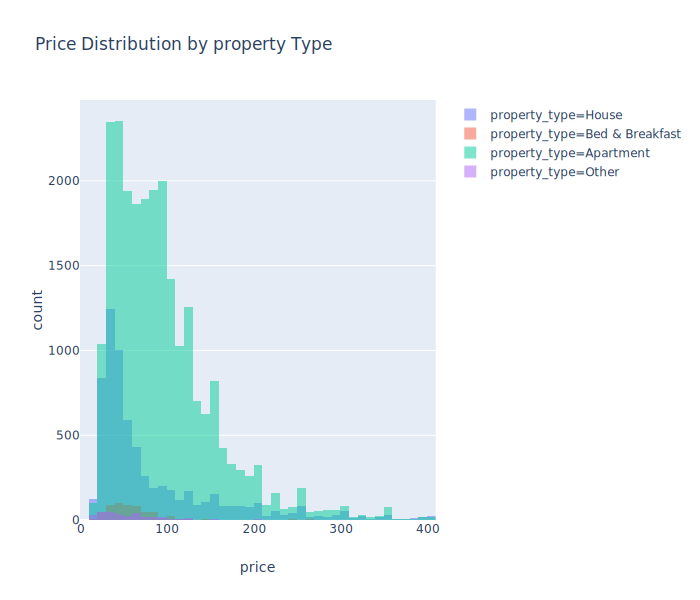

In [115]:
#Sketching price histogram by bed type and price

fig = px.histogram(ab_df, x="price", color="property_type", nbins=50, title='Price Distribution by property Type')
fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.5)
img_bytes = pio.to_image(fig, format="svg")
display(SVG(img_bytes))

---
##### Cancellation Policy vs Rating
---

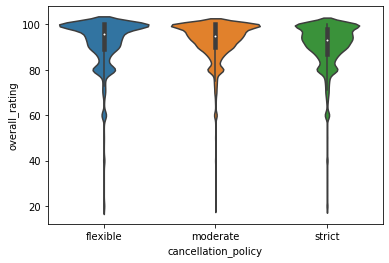

In [116]:
#Room type price spread

ax = sns.violinplot(x="cancellation_policy",  y="overall_rating", data = ab_df)

It seems like people tend to give less 100% ratings to the lisitngs with strict or moderate cancellation policy. 

---
#### Neighbourhood analysis by deal types and price
---

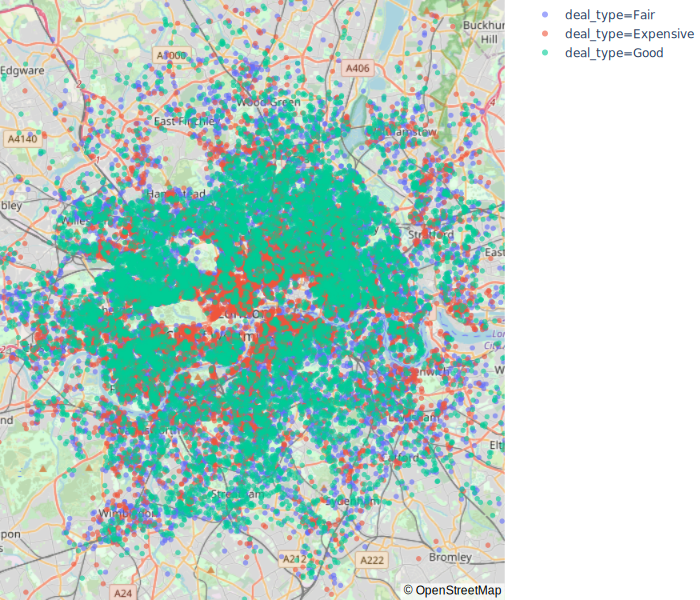

In [117]:
#Map visualization of the deal_types in london


fig = px.scatter_mapbox(ab_df, lat="latitude", lon="longitude",  color="deal_type", size_max=15, zoom=10)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_traces(opacity=0.6)
img_bytes = pio.to_image(fig, format="svg")
display(SVG(img_bytes))

---

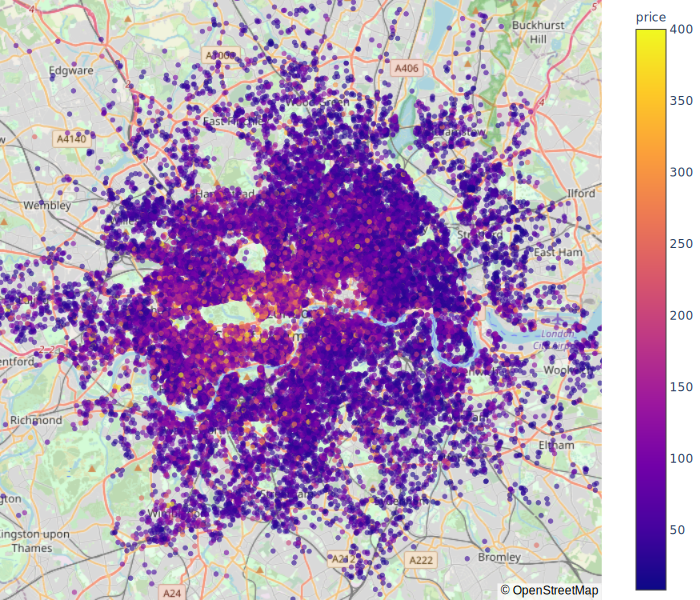

In [118]:
#Map visualization of the airbnb listing pricing in london


fig = px.scatter_mapbox(ab_df, lat="latitude", lon="longitude",  color="price", size_max=15, zoom=10)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_traces(opacity=0.6)
img_bytes = pio.to_image(fig, format="svg")
display(SVG(img_bytes))

The listing in the central London are understandably priced higher and finding a good or fair deal in central london will be difficult. Whereas, outside central london surrounding neighbourhoods show little variation in terms of price variance with few expensive deals scattered outside central London.

---

#### For last step we will drop encoded variable columns

In [119]:
#dropping cat_column array-list used to one-hot-encode earlier
ab_df.drop(cat_col, axis=1, inplace = True)

In [120]:
#dropping other categorical and unnecessary columns for our classification
ab_df.drop(['amenities', 'features', 'latitude','longitude', 'id'], axis =1, inplace = True)

In [121]:
ab_df.shape

(31604, 118)

In [122]:
#Quickly looking at all the 
for i in range(0, ab_df.columns.shape[0]):
    print (ab_df.columns[i])

title
summary
description
transit
house_rules
max_guests
bathrooms
bedrooms
beds
price
cleaning_fee
guests_included
charge_per_extra_guest
total_reviews
overall_rating
accuracy_rating
cleanliness_rating
check_in_rating
communication_rating
location_rating
value_rating
reviews_per_month
beds_per_bedroom
max_guests_per_bed
included_guests_per_bed
add_guests_upsell
professionally_managed
real_bed
relative_avg_price
deal_type
24-hour_check-in
air_conditioning
breakfast
buzzer/wireless_intercom
carbon_monoxide_detector
doorman
dryer
elevator_in_building
essentials
family/kid_friendly
fire_extinguisher
first_aid_kit
free_parking_on_premises
gym
heating
hot_tub
indoor_fireplace
internet
iron
keypad
kitchen
laptop_friendly_workspace
lock_on_bedroom_door
other_pet(s)
pets_allowed
pets_live_on_this_property
pool
private_entrance
private_living_room
safety_card
self_check-in
shampoo
smoke_detector
smoking_allowed
suitable_for_events
tv
washer
wheelchair_accessible
wireless_internet
host_identity_

#### Write a new file for cleaned data to be used in Modelling

In [123]:
#writing cleaned ready for classification data 
ab_df.to_csv('clean_data_w_deal.csv', index = False)

##### Pre-Processing done!